**INSTALANDO E ATUALIZANDO ALGUMAS BIBLIOTECAS A SEREM UTILIZADAS**

In [ ]:
pip install scikeras

In [ ]:
pip uninstall scikit-learn --yes

In [ ]:
pip uninstall imblearn --yes

In [ ]:
pip install scikit-learn==1.2.2

In [ ]:
pip install imblearn

In [ ]:
pip install boruta

In [ ]:
pip install shap

**IMPORTANDO BIBLIOTECAS**

In [ ]:
import shap
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics as st
import matplotlib.pyplot as plt
from boruta import BorutaPy
from keras.layers import Input, Dense
from keras.models import Sequential
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.compose import ColumnTransformer
from scikeras.wrappers import KerasClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay, classification_report, accuracy_score

**IMPORTANDO BASE DE DADOS**

In [ ]:
data = pd.read_excel('e_commerce_dataset.xlsx')
print(data.head())

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [ ]:
print(data.shape)

(5630, 20)


Para averiguar os valores faltantes na base de dados, tem-se que:

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


Ao se trabalhar com dados faltantes em análises de dados, tem-se as seguintes hipóteses:

*   Caso a quantidade de dados faltantes sejam inferiores à 5%, é permitida a remoção das linhas que contém os dados incompletos;
*   Caso a quantidade de dados faltantes estejam entre 5% e 10%, recomenda-se a aplicação do processo de imputação simples, o qual visa completar as lacunas ausentes com a média, mediana ou moda da coluna pertencente ao valor inexistente.


Desse modo, é importante saber quantos dados correspondem à 5% e 10% dentro do dataframe a ser trabalhado. Logo:


*   5% dos valores do dataframe



In [ ]:
quantity_5pc = 0.05*(data.shape[0])

print (f'5% de valores nulos: {quantity_5pc:.0f} dados.')

5% de valores nulos: 282 dados.




*   10% dos valores do dataframe



In [ ]:
quantity_10pc = 0.1*(data.shape[0])

print (f'10% de valores nulos: {quantity_10pc:.0f} dados.')

10% de valores nulos: 563 dados.


Se todas as colunas com ítens faltantes possuíssem, no máximo, 282 valores nulos, seria viável a exclusão dessas linhas. Entretanto, observou-se que a coluna "DaySinceLastOrder" possui 307 valores faltante, tornando mais coerente a aplicação do método de imputação simples.

**MÉTODO DE IMPUTAÇÃO SIMPLES**

Nesse tópico, será realizado o método de imputação simples para a correção dos dados faltantes a partir da inserção da mediana das colunas onde tais lacunas estão presentes. Logo, antes da imputação, tem-se que:

In [ ]:
print(data)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

Aplicando-se o método de imputação simples:

In [ ]:
imputer = SimpleImputer(strategy='median')


Tenure = data['Tenure'].values.reshape(-1, 1)

WarehouseToHome = data['WarehouseToHome'].values.reshape(-1, 1)

HourSpendOnApp = data['HourSpendOnApp'].values.reshape(-1, 1)

OrderAmountHikeFromlastYear = data['OrderAmountHikeFromlastYear'].values.reshape(-1, 1)

CouponUsed = data['CouponUsed'].values.reshape(-1, 1)

OrderCount = data['OrderCount'].values.reshape(-1, 1)

DaySinceLastOrder = data['DaySinceLastOrder'].values.reshape(-1, 1)


Tenure_imputed = imputer.fit_transform(Tenure)

WarehouseToHome_imputed = imputer.fit_transform(WarehouseToHome)

HourSpendOnApp_imputed = imputer.fit_transform(HourSpendOnApp)

OrderAmountHikeFromlastYear_imputed = imputer.fit_transform(OrderAmountHikeFromlastYear)

CouponUsed_imputed = imputer.fit_transform(CouponUsed)

OrderCount_imputed = imputer.fit_transform(OrderCount)

DaySinceLastOrder_imputed = imputer.fit_transform(DaySinceLastOrder)


data['Tenure'] = Tenure_imputed

data['WarehouseToHome'] = WarehouseToHome_imputed

data['HourSpendOnApp'] = HourSpendOnApp_imputed

data['OrderAmountHikeFromlastYear'] = OrderAmountHikeFromlastYear_imputed

data['CouponUsed'] = CouponUsed_imputed

data['OrderCount'] = OrderCount_imputed

data['DaySinceLastOrder'] = DaySinceLastOrder_imputed

Após a imputação, tem-se os seguintes resultados:

In [ ]:
print (data)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     9.0                Phone         1   
2          50003      1     9.0                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

Para confirmar a inexistência dos dados faltantes após a imputação:

In [ ]:
missing_values_post_treatment = data.isnull().sum()
print(missing_values_post_treatment)

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


Por fim, para se avaliar a presença de "IDs" duplicados (para evitar informações duplicadas), tem-se que:

In [ ]:
print(data['CustomerID'].duplicated().sum())

0


Logo, não há linhas duplicadas no conjunto de dados.

**ELIMINANDO A COLUNA "CustomerID", VISTO QUE ELA NÃO POSSUI IMPACTO NA ETAPA DE PREDIÇÃO (SERVE APENAS PARA IDENTIFICAÇÃO)**

In [ ]:
data = data.drop("CustomerID", axis = 1)
data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


**DIVIDINDO AS VARIÁVEIS DE ENTRADA E SAÍDA**

In [ ]:
y = data.iloc[:,0]
x = data.iloc[:,1:]

**TRANSFORMANDO DADOS CATEGÓRICOS EM NUMÉRICOS - LABEL ENCODER**

Tendo em vista que o algoritmo BorutaPy utilizado mais adiante será baseado em árvores de decisões, é mais viável utilizar o encoder categórico Label Encoder para evitar a esparsidade do banco de dados, o que prejudicaria a predição do modelo. Logo:

In [ ]:
columns_to_encode = ["PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus"]

In [ ]:
encoder = LabelEncoder()

In [ ]:
x_le = x

In [ ]:
for column in columns_to_encode:

    x_le[column] = encoder.fit_transform(x_le[column])

In [ ]:
x_le

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,9.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,9.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,0.0,2,1,12.0,0,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,0,1,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,13.0,1,1,13.0,3,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,3.0,224.91
5627,1.0,1,1,11.0,4,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,23.0,0,3,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90


**SELECIONANDO FEATURES - BORUTAPY**

BorutaPy é uma implementação em Python do algoritmo Boruta, usado para seleção de variáveis em modelos de aprendizado de máquina. Ele serve para identificar quais características de um conjunto de dados são mais relevantes para a predição, eliminando aquelas que são irrelevantes ou redundantes. O BorutaPy realiza múltiplas iterações de treinamento de um modelo com árvores de decisão, avaliando a importância de cada característica em comparação com variáveis artificiais. É útil para melhorar a eficiência e a interpretabilidade dos modelos.

Aplicando o BorutaPy, tem-se que:

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', verbose=2, random_state=42)

In [ ]:
x_le1 = x_le.values

In [ ]:
#Para evitar problemas de compatibilidade para os diversos tipos de variáveis no BorutaPy

np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [ ]:
boruta_selector.fit(x_le1, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	11
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	11
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	11
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	11
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	11
Itera

BorutaPy(estimator=RandomForestClassifier(n_estimators=37,
                                          random_state=RandomState(MT19937) at 0x7F8898DAF740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F8898DAF740, verbose=2)

In [ ]:
selected_features = x_le.columns[boruta_selector.support_]

In [ ]:
selected_features_df = pd.DataFrame(selected_features, columns=["Características selecionadas"])
print(selected_features_df)

  Características selecionadas
0                       Tenure
1              WarehouseToHome
2              NumberOfAddress
3                     Complain
4            DaySinceLastOrder
5               CashbackAmount


*   Novo dataframe de X com as melhores features escolhidas anteriormente:



In [ ]:
x_best = x[['Tenure', 'CashbackAmount', 'WarehouseToHome', 'NumberOfAddress',
            'DaySinceLastOrder','Complain']]

In [ ]:
x_best

,Tenure,CashbackAmount,WarehouseToHome,NumberOfAddress,DaySinceLastOrder,Complain
0,4.0,159.93,6.0,9,5.0,1
1,9.0,120.90,8.0,7,0.0,1
2,9.0,120.28,30.0,6,3.0,1
3,0.0,134.07,15.0,8,3.0,0
4,0.0,129.60,12.0,3,3.0,0
...,...,...,...,...,...,...
5625,10.0,150.71,30.0,6,4.0,0
5626,13.0,224.91,13.0,6,3.0,0
5627,1.0,186.42,11.0,3,4.0,1
5628,23.0,178.90,9.0,4,9.0,0


Observa-se que nenhuma coluna de dados categóricos foi selecionada pelo BorutaPy, o que culmina na não necessidade da aplicação do One Hot Encoder para a categorização dos dados a serem utilizados nas redes neurais posteriormente.

**DIVIDINDO DADOS DE TREINO E TESTE**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_best,y,test_size = 0.3, stratify = y, random_state = 42)

In [ ]:
x_train

,Tenure,CashbackAmount,WarehouseToHome,NumberOfAddress,DaySinceLastOrder,Complain
1186,9.0,115.14,20.0,2,0.0,0
3145,7.0,286.84,7.0,6,6.0,0
608,0.0,154.72,8.0,2,3.0,0
5202,18.0,156.62,12.0,5,4.0,0
4133,16.0,313.80,9.0,7,15.0,0
...,...,...,...,...,...,...
1916,0.0,143.64,6.0,4,0.0,0
5038,16.0,187.72,9.0,9,4.0,0
1384,6.0,153.76,6.0,3,3.0,0
4026,29.0,151.62,9.0,10,5.0,0


In [ ]:
y_train

1186    0
3145    0
608     0
5202    0
4133    0
       ..
1916    0
5038    0
1384    0
4026    0
2761    0
Name: Churn, Length: 3941, dtype: int64

**VERIFICANDO O DESBALANCEAMENTO DOS DADOS E APLICANDO OS MÉTODOS DE CORREÇÃO**

Para avaliarmos a proporção entre dados de ambas as classes avaliadas, tem-se que:

In [ ]:
y_train.value_counts()

Churn
0    3277
1     664
Name: count, dtype: int64

Observa-se um evidente desbalanceamento entre essas classes. Para corrigir isso, avaliaremos as técnicas SMOTE e NEAR MISS.

*   SMOTE



In [ ]:
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [ ]:
np.bincount(y_train_smt)

array([3277, 3277])

*   NEAR MISS



In [ ]:
nr = NearMiss()
x_train_nm, y_train_nm = nr.fit_resample(x_train, y_train)

In [ ]:
np.bincount(y_train_nm)

array([664, 664])

*   QUAL O MELHOR BALANCEAMENTO?



O melhor método de balanceamento será identificado mais adiante, após as predições com os dados provenientes das duas técnicas citadas anteriormente.

**NORMALIZANDO DADOS**

In [ ]:
sc_smt = StandardScaler()
x_train_smt = sc_smt.fit_transform(x_train_smt)
x_test_smt = sc_smt.transform(x_test)

sc_nm = StandardScaler()
x_train_nm = sc_nm.fit_transform(x_train_nm)
x_test_nm = sc_nm.transform(x_test)

In [ ]:
x_train_smt

array([[ 0.18524068, -1.23587091,  0.46642491, -0.86667845, -1.15923874,
        -0.64439513],
       [-0.06778313,  2.580729  , -1.10126778,  0.72575512,  0.6080652 ,
        -0.64439513],
       [-0.95336644, -0.35607461, -0.98067604, -0.86667845, -0.27558677,
        -0.64439513],
       ...,
       [-0.95336644, -1.04849023, -0.25712556, -0.86667845, -0.57013743,
         1.55184288],
       [-0.82685454, -0.36962711, -0.68117593, -0.86667845, -0.86468808,
        -0.64439513],
       [-0.82685454,  1.17367731,  0.46642491,  0.32764673, -0.27558677,
         1.55184288]])

In [ ]:
x_test_smt

array([[ 2.0829192 , -0.35385178, -0.98067604,  0.72575512, -0.57013743,
        -0.64439513],
       [-0.82685454, -0.77641186, -0.01594207, -0.46857006, -0.86468808,
        -0.64439513],
       [-0.44731883,  0.16228945,  2.15470936,  1.92008031,  1.19716651,
        -0.64439513],
       ...,
       [ 2.58896681,  1.7022664 , -1.22185953, -0.46857006, -1.15923874,
        -0.64439513],
       [-0.57383073, -0.35563005, -0.01594207,  2.71629709, -0.27558677,
        -0.64439513],
       [ 0.69128828, -0.54123639,  0.46642491, -0.86667845, -0.57013743,
        -0.64439513]])

In [ ]:
x_train_nm

array([[-0.7818288 , -0.84591421, -0.17110579, -0.71955822, -0.35442195,
        -0.73040215],
       [-0.7818288 , -0.84591421, -0.17110579, -0.71955822, -0.35442195,
        -0.73040215],
       [-0.7818288 , -0.80729605, -0.03884241, -0.71955822, -0.35442195,
        -0.73040215],
       ...,
       [-0.7818288 , -0.9234778 , -0.17110579, -0.31084423, -0.35442195,
         1.36910879],
       [-0.57392559, -0.03100562,  0.35794774, -0.31084423, -0.71843768,
         1.36910879],
       [ 1.08930012, -1.03475046,  0.35794774, -0.71955822, -1.08245342,
        -0.73040215]])

In [ ]:
x_test_nm

array([[ 4.20784833,  0.09401248, -0.96468609,  0.91529775, -0.35442195,
        -0.73040215],
       [-0.57392559, -0.52813259,  0.09342097, -0.31084423, -0.71843768,
        -0.73040215],
       [ 0.04978405,  0.85393929,  2.47416186,  2.14143972,  1.82967247,
        -0.73040215],
       ...,
       [ 5.03946118,  3.12128335, -1.22921285, -0.31084423, -1.08245342,
        -0.73040215],
       [-0.15811916,  0.0913943 ,  0.09342097,  2.9588677 ,  0.00959379,
        -0.73040215],
       [ 1.92091298, -0.18187826,  0.6224745 , -0.71955822, -0.35442195,
        -0.73040215]])

**CONSTRUINDO A RNA (BALANCEAMENTO SMOTE)**


*   Seleção do número de neurônios da camada de processamento:



In [ ]:
def Return_Recall_smt(x_test_smt, y_test):
    y_pred_smt = ann_smt.predict(x_test_smt)
    y_pred_smt = (y_pred_smt > 0.5)

    score_smt1 = recall_score(y_test, y_pred_smt)*100
    score_smt2 = accuracy_score(y_test, y_pred_smt)*100

    ann_smt_2 = KerasClassifier(model=ann_smt, epochs=50, batch_size=64, verbose=0)
    # Como o cross_val_score é incompatível com o Sequential, ele foi encapsulado no KerasClassifier.

    score_model_smt = cross_val_score(ann_smt_2, x_test_smt, y_test, cv=5, scoring='accuracy')

    list_scoresm_smt.append (score_model_smt)
    list_ReturnRecall_smt.append (score_smt1)
    list_ReturnAccuracy_smt.append (score_smt2)

    return print(f"Recall e Acurácia (SMOTE) com a validação (%):{score_smt1} e {score_smt2}. Scores do modelo: {score_model_smt}")

In [ ]:
list_ReturnRecall_smt = []
list_ReturnAccuracy_smt = []
list_scoresm_smt = []

list_neurons_smt = [2,4,6,8]

for i in list_neurons_smt:
    ann_smt = Sequential()

    ann_smt.add (tf.keras.layers.Dense (units=i, activation='relu', kernel_initializer = 'he_normal'))
    ann_smt.add (tf.keras.layers.Dense (units=1, activation='sigmoid', kernel_initializer = 'he_normal'))

    optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
    ann_smt.compile(optimizer=optimize, loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

    ann_smt.fit(x_train_smt, y_train_smt, batch_size=64, epochs=50)

    Return_Recall_smt(x_test_smt, y_test)

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6473 - recall_7: 0.6535
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5209 - recall_7: 0.7586
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5222 - recall_7: 0.7484
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5128 - recall_7: 0.7518
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5097 - recall_7: 0.7369
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5100 - recall_7: 0.7313
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5099 - recall_7: 0.7316
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5107 - recall_7: 0.7328
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5058 - recall_7: 0.7248
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4983 - recall_7: 0.7356
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5033 - recall_7: 0.7194
Epoch 12/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



*   Recall, Acurácia e Score da validação cruzada do modelo para cada quantidade de neurônios na camada intermediária:



In [ ]:
list_scoresm_average_smt = []

for w in list_scoresm_smt:

  average = st.mean(w)

  list_scoresm_average_smt.append(average*100)


data_df = {'Recall': list_ReturnRecall_smt, 'Accuracy': list_ReturnAccuracy_smt, 'SCORE': list_scoresm_average_smt}

df_neurons_smt = pd.DataFrame (data_df, index = list_neurons_smt, columns = ['Recall', 'Accuracy', 'SCORE']).sort_values('Recall',
                                                                                                      ascending=False)
df_neurons_smt

,Recall,Accuracy,SCORE
8,81.338028,81.172291,88.395695
6,80.633803,80.521018,87.448598
4,80.281690,79.336886,88.277352
2,72.535211,80.461812,86.323109


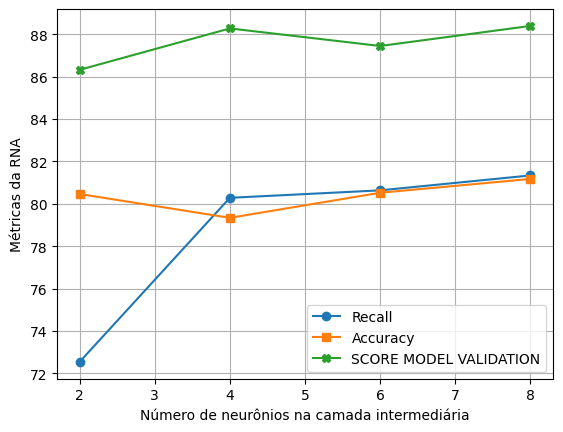

In [ ]:
plt.plot(list_neurons_smt, list_ReturnRecall_smt, marker = 'o')
plt.plot(list_neurons_smt, list_ReturnAccuracy_smt, marker = 's')
plt.plot(list_neurons_smt, list_scoresm_average_smt, marker = 'X')
plt.xlabel ('Número de neurônios na camada intermediária')
plt.ylabel ('Métricas da RNA')
plt.legend (['Recall', 'Accuracy', 'SCORE MODEL VALIDATION'])
plt.grid()
plt.show()

Observa-se que tais indicadores se mantêm equilibrados para 4, 6 e 8 neurônios na camada intermediária. Entretanto, nota-se uma certa superioridade dos indicadores para 8 neurônios, quantidade essa que será adotada para o treino da RNA.



*   Treino da RNA:



In [ ]:
ann_smt = Sequential()

ann_smt.add (tf.keras.layers.Dense (units=8, activation='relu', kernel_initializer = 'he_normal'))
ann_smt.add (tf.keras.layers.Dense (units=1, activation='sigmoid', kernel_initializer = 'he_normal'))

optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
ann_smt.compile(optimizer=optimize, loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

ann_smt.fit(x_train_smt, y_train_smt, batch_size=64, epochs=50)

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6182 - recall_11: 0.7058
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4945 - recall_11: 0.7715
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4886 - recall_11: 0.7737
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4784 - recall_11: 0.7881
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4690 - recall_11: 0.7891
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4593 - recall_11: 0.7896
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4632 - recall_11: 0.7851
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4535 - recall_11: 0.7999
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4473 - recall_11: 0.7888
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4545 - recall_11: 0.7779
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4516 - recall_11: 0.7798
Epoch 12/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 


*   Predição da RNA e resultados:



Para a predição da rede, será adotado 3 valores de thresholds e avaliado qual o melhor desempenho dentre eles.

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


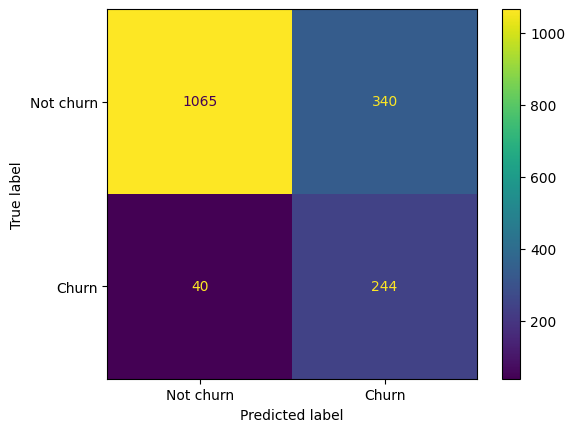

Recall da validação (%):  85.91549295774648
Acurácia da validação (%):  77.50148016577857
SCORE do modelo (%):  87.80362755254333
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


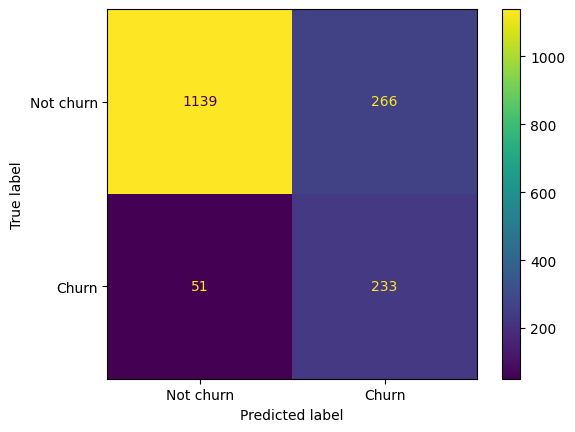

Recall da validação (%):  82.04225352112677
Acurácia da validação (%):  81.23149792776792
SCORE do modelo (%):  87.92249749793689
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


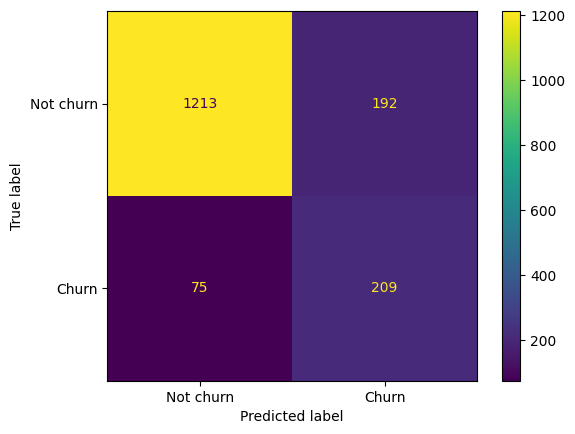

Recall da validação (%):  73.59154929577466
Acurácia da validação (%):  84.19182948490231
SCORE do modelo (%):  87.80397871929486


In [ ]:
thresholds = [0.4, 0.5, 0.6]

for i in thresholds:

  y_pred_smt = ann_smt.predict(x_test_smt)
  y_pred_smt = (y_pred_smt > i)

  pred_array_smt = 1 * y_pred_smt.reshape(len(y_pred_smt), 1)
  test_array_smt = y_test.values.reshape(len(y_test), 1)

  ann_smt_2 = KerasClassifier(model=ann_smt, epochs=50, batch_size=64, verbose=0)
  # Como o cross_val_score é incompatível com o Sequential, ele foi encapsulado no KerasClassifier.

  score_model_smt = cross_val_score(ann_smt_2, x_test_smt, y_test, cv=5, scoring='accuracy')
  score_model_smt = st.mean(score_model_smt)

  cm_smt = confusion_matrix(test_array_smt, pred_array_smt)

  cm_display_smt = ConfusionMatrixDisplay(confusion_matrix = cm_smt, display_labels = ["Not churn", "Churn"])

  cm_display_smt.plot()
  plt.show()

  print("Recall da validação (%): ", ((recall_score(y_test, y_pred_smt)*100)))
  print("Acurácia da validação (%): ", ((accuracy_score(y_test, y_pred_smt)*100)))
  print("SCORE do modelo (%): ", (score_model_smt*100))

Utilizou-se o "Recall" como métrica principal de avaliação desta predição pelo fato deste indicador ter uma maior efetividade no estudo dos falsos negativos. A aparição de falsos negativos é bastante prejudicial nesta ocasião, dado que o erro na previsão da não saída de clientes pode ocasionar prejuízos financeiros significativos para a instituição. O melhor valor de Recall obtido foi com um threshould de 0.4, apresentando um score de validação de modelo equivalente aos demais e uma satisfatória acuracidade.

**CONSTRUINDO A RNA (BALANCEAMENTO NEAR MISS)**


*   Seleção do número de neurônios da camada de processamento:



In [ ]:
def Return_Recall_nm(x_test_nm, y_test):
    y_pred_nm = ann_nm.predict(x_test_nm)
    y_pred_nm = (y_pred_nm > 0.5)

    score_nm1 = recall_score(y_test, y_pred_nm)*100
    score_nm2 = accuracy_score(y_test, y_pred_nm)*100

    ann_nm_2 = KerasClassifier(model=ann_nm, epochs=10, batch_size=64, verbose=0)
    # Como o cross_val_score é incompatível com o Sequential, ele foi encapsulado no KerasClassifier.

    score_model_nm = cross_val_score(ann_nm_2, x_test_nm, y_test, cv=5, scoring='accuracy')

    list_scoresm_nm.append (score_model_nm)
    list_ReturnRecall_nm.append (score_nm1)
    list_ReturnAccuracy_nm.append (score_nm2)

    return print(f"Recall e Acurácia (NEAR MISS) com a validação (%):{score_nm1} e {score_nm2}. Scores do modelo: {score_model_nm}")

In [ ]:
list_ReturnRecall_nm = []
list_ReturnAccuracy_nm = []
list_scoresm_nm = []

list_neurons_nm = [2,4,6,8]

for i in list_neurons_nm:
    ann_nm = Sequential()

    ann_nm.add (tf.keras.layers.Dense (units=i, activation='relu', kernel_initializer = 'he_normal'))
    ann_nm.add (tf.keras.layers.Dense (units=1, activation='sigmoid', kernel_initializer = 'he_normal'))

    optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
    ann_nm.compile(optimizer=optimize, loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

    ann_nm.fit(x_train_nm, y_train_nm, batch_size=32, epochs=50)

    Return_Recall_nm(x_test_nm, y_test)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7804 - recall_12: 0.4525
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6354 - recall_12: 0.5972
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5759 - recall_12: 0.7226
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5727 - recall_12: 0.7515
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5574 - recall_12: 0.7321
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5647 - recall_12: 0.7391
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5668 - recall_12: 0.7231
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5607 - recall_12: 0.7250
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5322 - recall_12: 0.7487
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5556 - recall_12: 0.7302
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5408 - recall_12: 0.7341
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.53



*   Recall, Acurácia e Score da validação cruzada do modelo para cada quantidade de neurônios na camada intermediária:



In [ ]:
list_scoresm_average_nm = []

for w in list_scoresm_nm:

  average = st.mean(w)

  list_scoresm_average_nm.append(average*100)


data_df = {'Recall': list_ReturnRecall_nm, 'Accuracy': list_ReturnAccuracy_nm, 'SCORE': list_scoresm_average_nm}

df_neurons_nm = pd.DataFrame (data_df, index = list_neurons_nm, columns = ['Recall', 'Accuracy', 'SCORE']).sort_values('Recall',
                                                                                                      ascending=False)
df_neurons_nm

,Recall,Accuracy,SCORE
6,77.816901,49.555950,88.216951
8,75.704225,48.016578,87.507418
4,75.352113,47.246892,86.382807
2,71.126761,50.088810,86.441978


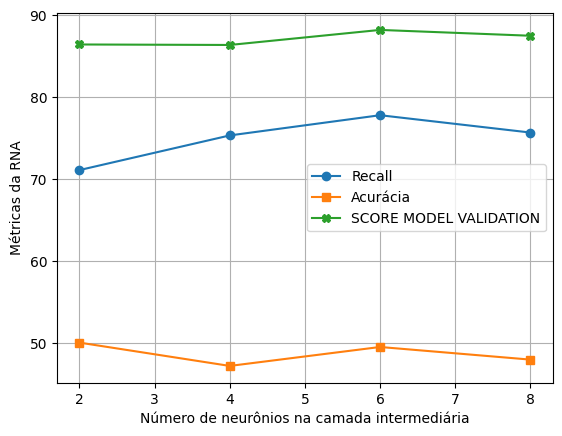

In [ ]:
plt.plot(list_neurons_nm, list_ReturnRecall_nm, marker = 'o')
plt.plot(list_neurons_nm, list_ReturnAccuracy_nm, marker = 's')
plt.plot(list_neurons_smt, list_scoresm_average_nm, marker = 'X')
plt.xlabel ('Número de neurônios na camada intermediária')
plt.ylabel ('Métricas da RNA')
plt.legend (['Recall', 'Acurácia', 'SCORE MODEL VALIDATION'])
plt.grid()
plt.show()

Observa-se que tais indicadores se mantêm equilibrados para as quantidades de neurônios analisados. Entretanto, nota-se uma certa superioridade dessas  métricas para 6 neurônios, valor esse que será adotado para o treino da RNA.



*   Treino da RNA:



In [ ]:
ann_nm = Sequential()

ann_nm.add (tf.keras.layers.Dense (units=8, activation='relu', kernel_initializer = 'he_normal'))
ann_nm.add (tf.keras.layers.Dense (units=1, activation='sigmoid', kernel_initializer = 'he_normal'))

optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
ann_nm.compile(optimizer=optimize, loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

ann_nm.fit(x_train_nm, y_train_nm, batch_size=32, epochs=50)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.8266 - recall_16: 0.2669
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6086 - recall_16: 0.7257
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5608 - recall_16: 0.7713
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5787 - recall_16: 0.7618
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5413 - recall_16: 0.7922
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5596 - recall_16: 0.7518
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4995 - recall_16: 0.7958
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5015 - recall_16: 0.7906
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4990 - recall_16: 0.7546
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5019 - recall_16: 0.7401
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4762 - recall_16: 0.7467
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.46


*   Predição da RNA e resultados:



Para a predição da rede, será adotado 3 valores de thresholds e avaliado qual o melhor desempenho dentre eles.

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


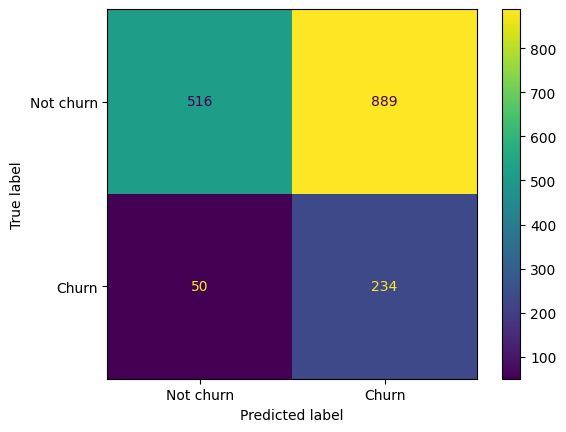

Recall da validação (%):  82.3943661971831
Acurácia da validação (%):  44.40497335701599
SCORE do modelo (%):  87.98149351219426
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


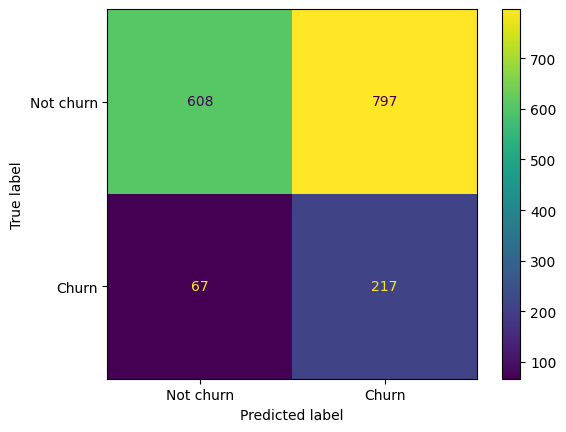

Recall da validação (%):  76.40845070422534
Acurácia da validação (%):  48.84547069271758
SCORE do modelo (%):  88.8695942268186
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


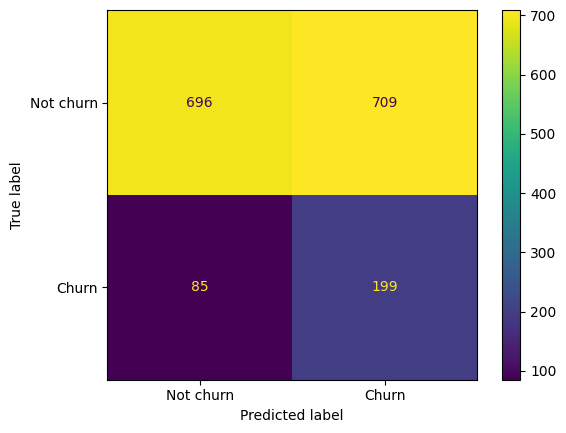

Recall da validação (%):  70.07042253521126
Acurácia da validação (%):  52.989934872705746
SCORE do modelo (%):  88.1000122908363


In [ ]:
thresholds = [0.4, 0.5, 0.6]

for i in thresholds:

  y_pred_nm = ann_nm.predict(x_test_nm)
  y_pred_nm = (y_pred_nm > i)

  pred_array_nm = 1 * y_pred_nm.reshape(len(y_pred_nm), 1)
  test_array_nm = y_test.values.reshape(len(y_test), 1)

  ann_nm_2 = KerasClassifier(model=ann_nm, epochs=50, batch_size=64, verbose=0)
  # Como o cross_val_score é incompatível com o Sequential, ele foi encapsulado no KerasClassifier.

  score_model_nm = cross_val_score(ann_nm_2, x_test_nm, y_test, cv=5, scoring='accuracy')
  score_model_nm = st.mean(score_model_nm)

  cm_nm = confusion_matrix(test_array_nm, pred_array_nm)

  cm_display_nm = ConfusionMatrixDisplay(confusion_matrix = cm_nm, display_labels = ["Not churn", "Churn"])

  cm_display_nm.plot()
  plt.show()

  print("Recall da validação (%): ", ((recall_score(y_test, y_pred_nm)*100)))
  print("Acurácia da validação (%): ", ((accuracy_score(y_test, y_pred_nm)*100)))
  print("SCORE do modelo (%): ", (score_model_nm*100))

Diferentemente do método de balanceamento anterior, foram obtidas baixas acuracidades para o modelo Near Miss, apesar dos valores de Recall e Score das validações cruzadas serem satisfatório. Tal fato pode ser justificado pela significativa redução do volume de dados após esse tipo de balanceamento, o qual não acarretou em uma aprendizagem de máquina eficiente.

**QUAL O MELHOR BALANCEAMENTO?**

Tendo em vista os fatos mencionados, é evidente que o método de balanceamento SMOTE com 8 neurônios na camada intermediária e threshold de 0.4 foi o mais bem avaliado nesse estudo.

**CURVA DE APRENDIZAGEM**

A avaliação das curvas de aprendizagem é de fundamental importância para se identificar a relação entre a quantidade de dados de treino e a eficiência do aprendizado de máquina, sendo crucial no universo da análise de dados. Primeiramente, insere-se o modelo de aprendizado de máquina a ser utilizado:

In [ ]:
classif = MLPClassifier(hidden_layer_sizes=(8,), max_iter=10000, activation='relu', random_state=42,
                        solver = 'adam', alpha=0.001, learning_rate='adaptive', batch_size = 64, verbose=2)

In [ ]:
score_model_curve = cross_val_score(classif, x_best, y, cv=5, scoring='accuracy')
score_model_curve = st.mean(score_model_curve)

Iteration 1, loss = 6.05234018
Iteration 2, loss = 5.01659537
Iteration 3, loss = 2.81270492
Iteration 4, loss = 0.94022117
Iteration 5, loss = 0.38920708
Iteration 6, loss = 0.38506521
Iteration 7, loss = 0.38329978
Iteration 8, loss = 0.37901140
Iteration 9, loss = 0.37741450
Iteration 10, loss = 0.37404240
Iteration 11, loss = 0.37198964
Iteration 12, loss = 0.37010335
Iteration 13, loss = 0.36779305
Iteration 14, loss = 0.36575673
Iteration 15, loss = 0.36443293
Iteration 16, loss = 0.36219054
Iteration 17, loss = 0.36124132
Iteration 18, loss = 0.35978568
Iteration 19, loss = 0.35839628
Iteration 20, loss = 0.35795764
Iteration 21, loss = 0.35727381
Iteration 22, loss = 0.35542774
Iteration 23, loss = 0.35444334
Iteration 24, loss = 0.35344395
Iteration 25, loss = 0.35269451
Iteration 26, loss = 0.35209823
Iteration 27, loss = 0.35067481
Iteration 28, loss = 0.35038386
Iteration 29, loss = 0.35040552
Iteration 30, loss = 0.34847091
Iteration 31, loss = 0.34942218
Iteration 32, los

In [ ]:
print("SCORE do modelo da curva de aprendizado (%): ", (score_model_curve*100))

SCORE do modelo da curva de aprendizado (%):  86.53641207815275


Observa-se um score satisfatório para a validação cruzada do modelo.

Em seguida, a curva de aprendizado é implementada da seguinte forma:

In [ ]:
train_sizes_abs, train_scores, test_scores = learning_curve(classif, x_best, y, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97, 0.99],
                                                            scoring = 'accuracy', cv=5)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 52, loss = 0.35129220
Iteration 53, loss = 0.35283993
Iteration 54, loss = 0.35211881
Iteration 55, loss = 0.35075031
Iteration 56, loss = 0.35234167
Iteration 57, loss = 0.34904733
Iteration 58, loss = 0.34910829
Iteration 59, loss = 0.35012694
Iteration 60, loss = 0.34932103
Iteration 61, loss = 0.34832987
Iteration 62, loss = 0.34855398
Iteration 63, loss = 0.34750777
Iteration 64, loss = 0.34743419
Iteration 65, loss = 0.34741799
Iteration 66, loss = 0.34585355
Iteration 67, loss = 0.34526662
Iteration 68, loss = 0.34612185
Iteration 69, loss = 0.34730542
Iteration 70, loss = 0.34618149
Iteration 71, loss = 0.34519630
Iteration 72, loss = 0.34478095
Iteration 73, loss = 0.34367272
Iteration 74, loss = 0.34376383
Iteration 75, loss = 0.34351856
Iteration 76, loss = 0.34346536
Iteration 77, loss = 0.34423366
Iteration 78, loss = 0.34157912
Iteration 79, loss = 0.34314859
Iteration 80, loss = 0.34338568
Iteration 81,

In [ ]:
train_sizes_abs

array([ 450,  900, 1351, 1801, 2252, 2702, 3152, 3603, 4053, 4278, 4368,
       4458])

In [ ]:
train_scores

array([[0.82666667, 0.82222222, 0.82222222, 0.82222222, 0.82222222],
       [0.85222222, 0.84      , 0.84      , 0.84      , 0.84      ],
       [0.85566247, 0.85936343, 0.84678016, 0.84678016, 0.84678016],
       [0.84952804, 0.85563576, 0.85452526, 0.85452526, 0.85452526],
       [0.85834813, 0.86012433, 0.86234458, 0.86056838, 0.86056838],
       [0.8623242 , 0.85973353, 0.85640266, 0.86343449, 0.86343449],
       [0.87024112, 0.86516497, 0.86516497, 0.86294416, 0.86294416],
       [0.86400222, 0.87066334, 0.86344713, 0.85983902, 0.86427977],
       [0.86454478, 0.86701209, 0.8662719 , 0.86183074, 0.85689613],
       [0.86699392, 0.86395512, 0.86979897, 0.86231884, 0.86465638],
       [0.86492674, 0.86744505, 0.86378205, 0.86767399, 0.86401099],
       [0.86608345, 0.86765366, 0.86810229, 0.86742934, 0.86047555]])

In [ ]:
test_scores

array([[0.8401421 , 0.84547069, 0.84635879, 0.84547069, 0.8383659 ],
       [0.85435169, 0.85968028, 0.86678508, 0.86145648, 0.86056838],
       [0.85790409, 0.86589698, 0.86056838, 0.86145648, 0.86056838],
       [0.85346359, 0.86767318, 0.85879218, 0.86323268, 0.86589698],
       [0.85523979, 0.86056838, 0.86323268, 0.86856128, 0.86944938],
       [0.86412078, 0.86056838, 0.86234458, 0.87033748, 0.86944938],
       [0.86412078, 0.86234458, 0.86412078, 0.87033748, 0.87122558],
       [0.86056838, 0.86856128, 0.86323268, 0.86145648, 0.87655417],
       [0.85968028, 0.86323268, 0.86412078, 0.87388988, 0.86767318],
       [0.86234458, 0.86056838, 0.86678508, 0.86944938, 0.87122558],
       [0.85968028, 0.86145648, 0.86323268, 0.87833037, 0.87300178],
       [0.85879218, 0.86412078, 0.86323268, 0.87300178, 0.86856128]])

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

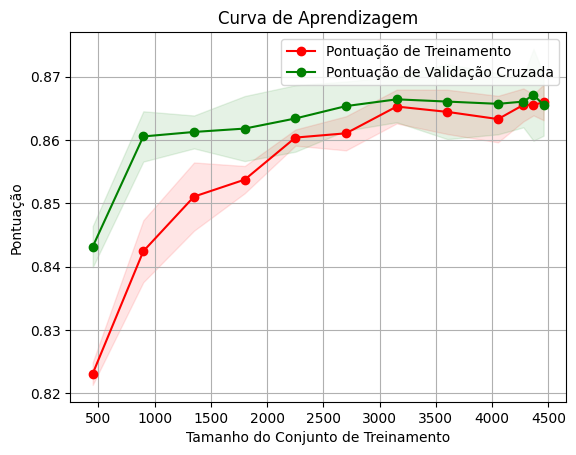

In [ ]:
plt.figure()
plt.title("Curva de Aprendizagem")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Pontuação")
plt.grid()

plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
         label="Pontuação de Treinamento")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
         label="Pontuação de Validação Cruzada")

plt.legend(loc="best")
plt.show()

Observa-se que a pontuação da curva de aprendizagem tende a uma estabilização com o aumento do tamanho do conjunto de treinamento da rede, o que expressa que a inclusão de novos dados de treinamento não trará melhoria significativa ao aprendizado de máquina.